In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/NFLX.csv')

In [ ]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
df.sort_index(inplace=True)
del df['Date']
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
df.shape

(1009, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
data = df['Adj Close']

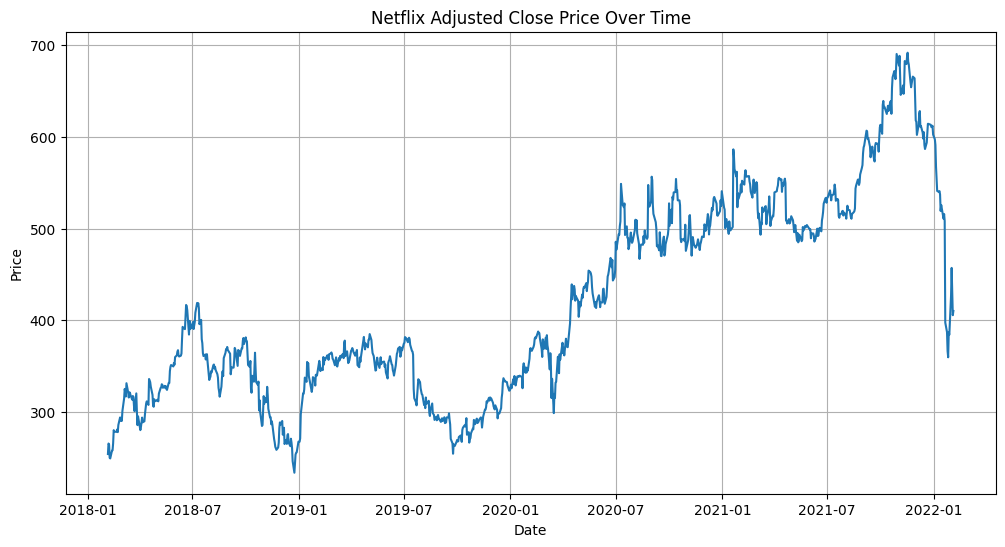

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title('Netflix Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

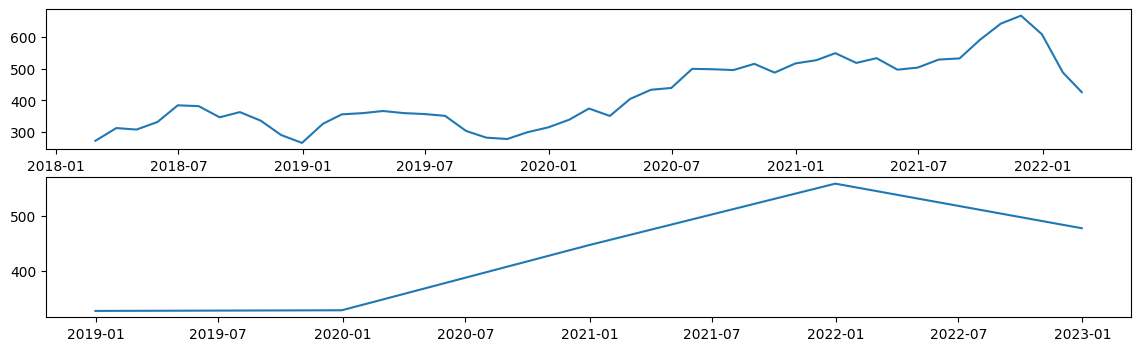

In [ ]:
plt.rcParams['figure.figsize'] = [14, 4]
annual_stc = data.resample('YE').mean()
monthly_stc = data.resample('ME').mean()
fig, axes = plt.subplots(2,1)
axes[0].plot(monthly_stc)
axes[1].plot(annual_stc)

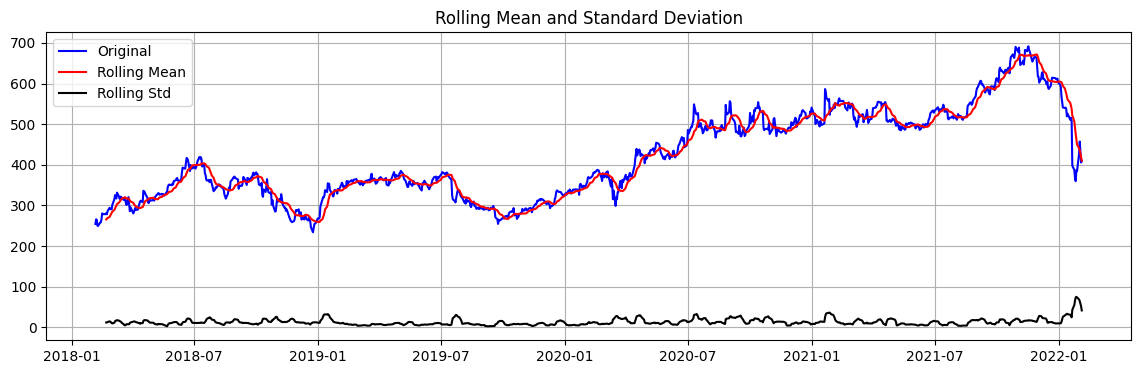

In [ ]:
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()


orig = plt.plot(data, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.grid()
plt.show(block=False)

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data.dropna())
adf_output = {
    'ADF Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Critical Values': adf_result[4]
}
adf_output

{'ADF Statistic': np.float64(-1.8125906878289955),
 'p-value': np.float64(0.3742289256820759),
 'Critical Values': {'1%': np.float64(-3.436893045520188),
  '5%': np.float64(-2.8644287878535146),
  '10%': np.float64(-2.568308127138936)}}

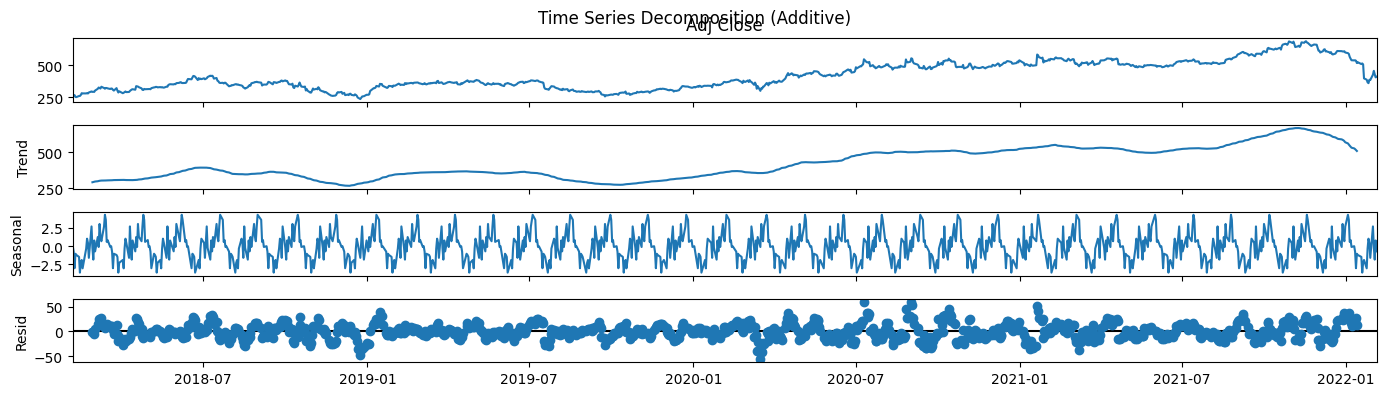

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data, model='additive', period=30)  # Approx. monthly seasonality


fig = decomposition.plot()
plt.suptitle('Time Series Decomposition (Additive)')
plt.show()

In [ ]:
data_diff = data.diff().dropna()

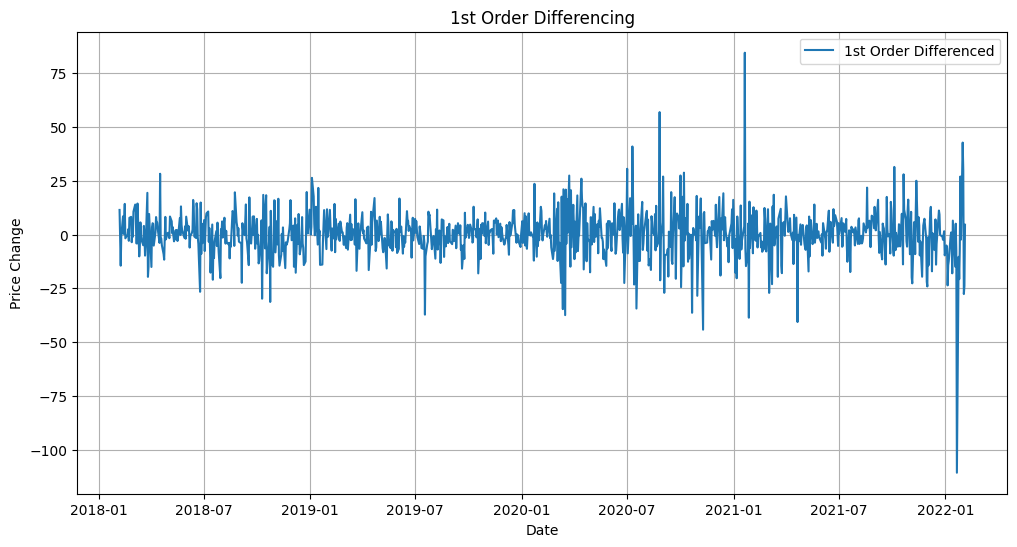

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_diff, label='1st Order Differenced')
plt.title('1st Order Differencing')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
rolling_mean_diff = data_diff.rolling(window=30).mean()
rolling_std_diff = data_diff.rolling(window=30).std()

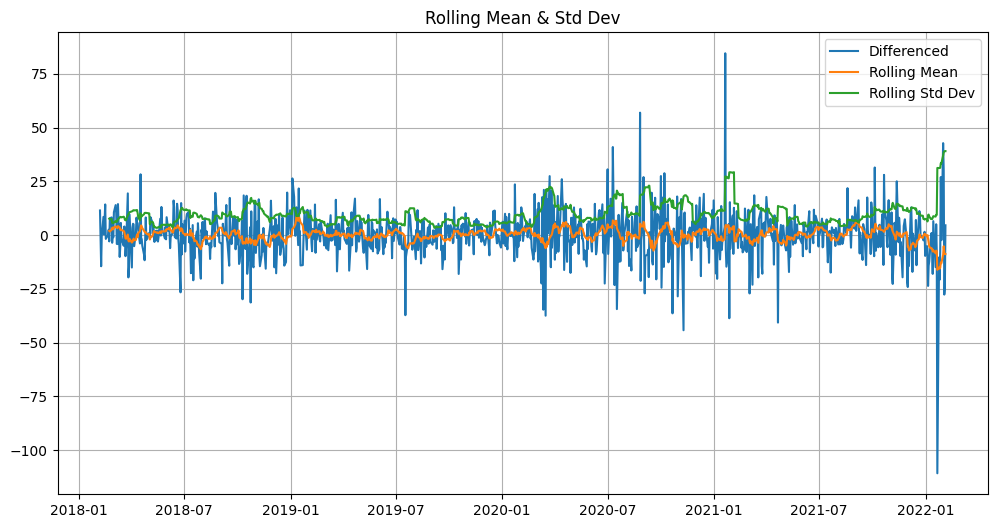

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_diff, label='Differenced')
plt.plot(rolling_mean_diff, label='Rolling Mean')
plt.plot(rolling_std_diff, label='Rolling Std Dev')
plt.title('Rolling Mean & Std Dev')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
adf_diff_result = adfuller(data_diff)
adf_diff_output = {
    'ADF Statistic': adf_diff_result[0],
    'p-value': adf_diff_result[1],
    'Critical Values': adf_diff_result[4]
}
adf_diff_output

{'ADF Statistic': np.float64(-14.24227599292912),
 'p-value': np.float64(1.5304022754298515e-26),
 'Critical Values': {'1%': np.float64(-3.436893045520188),
  '5%': np.float64(-2.8644287878535146),
  '10%': np.float64(-2.568308127138936)}}

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1000x400 with 0 Axes>

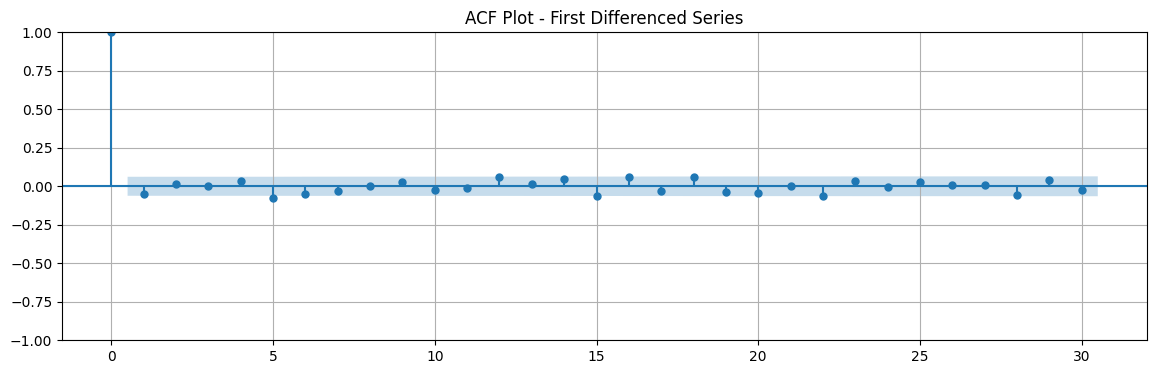

In [ ]:
plt.figure(figsize=(10, 4))
plot_acf(data_diff, lags=30)
plt.title("ACF Plot - First Differenced Series")
plt.grid(True)
plt.show()

<Figure size 1000x400 with 0 Axes>

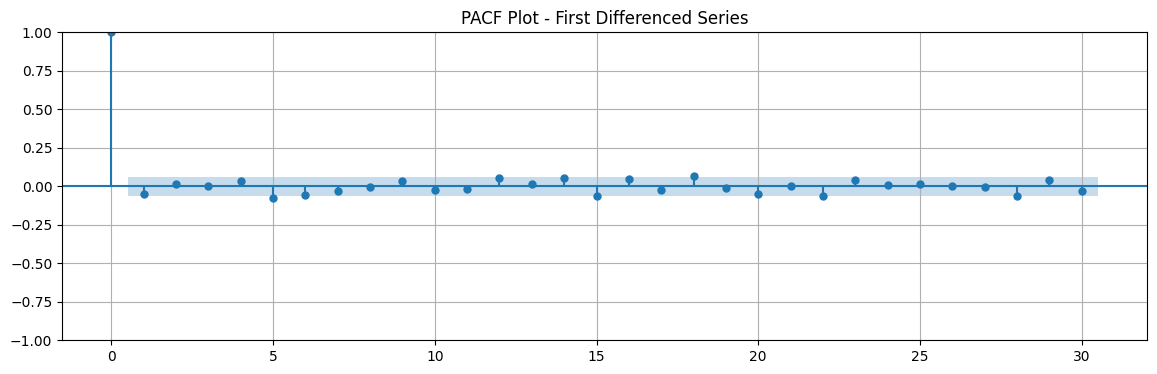

In [ ]:
plt.figure(figsize=(10, 4))
plot_pacf(data_diff, lags=30, method='ywm')
plt.title("PACF Plot - First Differenced Series")
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model_summary = model_fit.summary()

In [ ]:
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


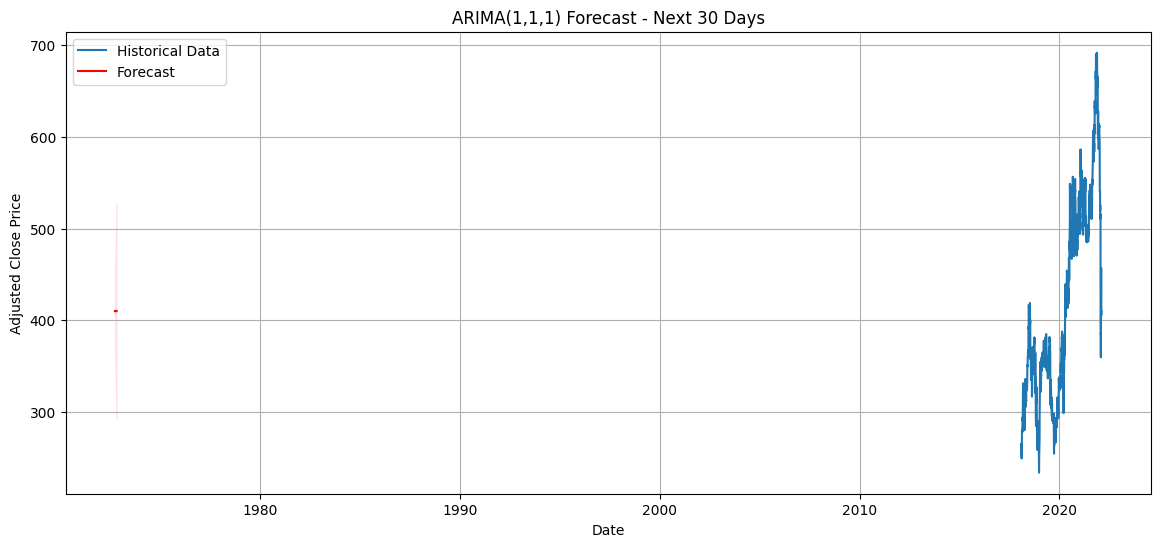

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(data, label='Historical Data')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA(1,1,1) Forecast - Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model_summary.tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,-0.8798,0.119,-7.414,0.000,-1.112,-0.647
ma.L1,0.8509,0.133,6.388,0.000,0.590,1.112
sigma2,121.6347,1.982,61.374,0.000,117.750,125.519


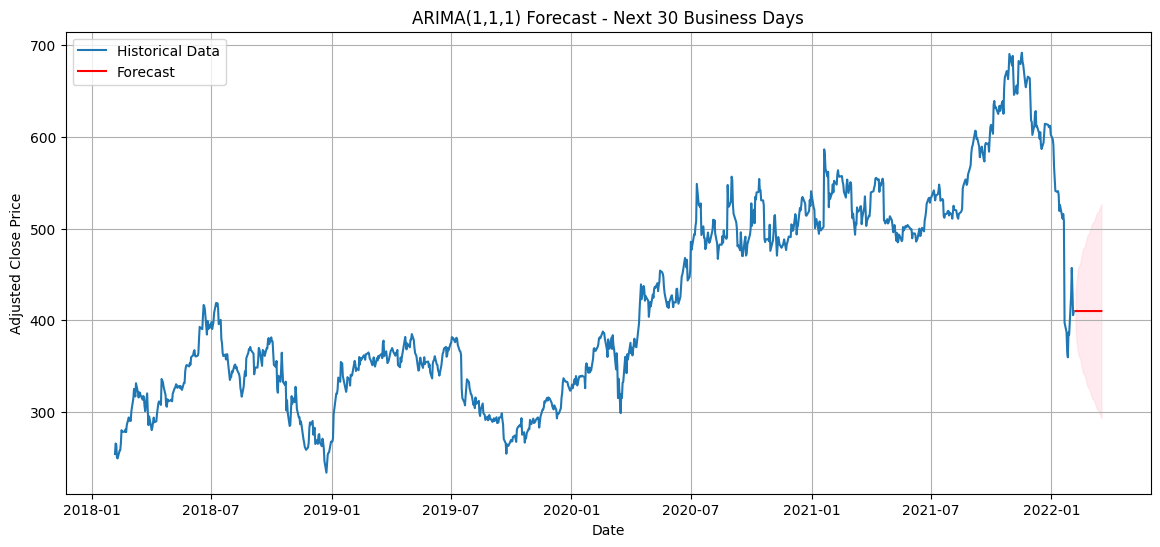

In [ ]:
last_date = data.index[-1]

forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='B')  # 'B' for business days

forecast_ci = forecast_ci.astype(float)

plt.figure(figsize=(14, 6))
plt.plot(data, label='Historical Data')
plt.plot(forecast_dates, forecast_mean.values, label='Forecast', color='red')
plt.fill_between(forecast_dates,
                 forecast_ci.iloc[:, 0].values,
                 forecast_ci.iloc[:, 1].values, color='pink', alpha=0.3)
plt.title('ARIMA(1,1,1) Forecast - Next 30 Business Days')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


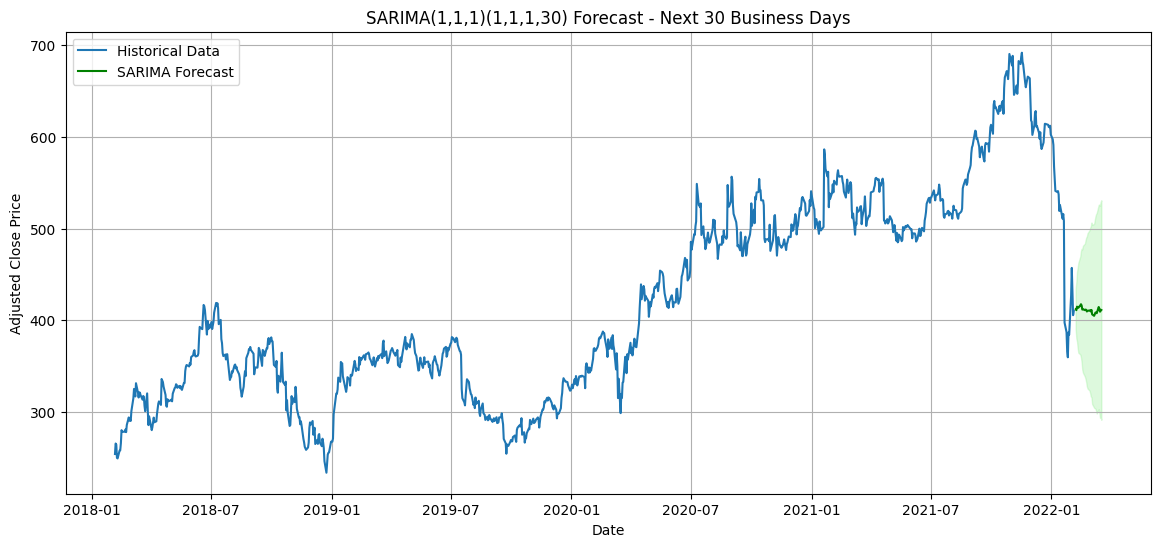

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMAX
sarima_model = SARIMAX(data,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 30),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

# next 30 days forcasting
sarima_forecast = sarima_result.get_forecast(steps=30)
sarima_mean = sarima_forecast.predicted_mean
sarima_ci = sarima_forecast.conf_int()
sarima_ci = sarima_ci.astype(float)

plt.figure(figsize=(14, 6))
plt.plot(data, label='Historical Data')
plt.plot(forecast_dates, sarima_mean.values, label='SARIMA Forecast', color='green')
plt.fill_between(forecast_dates,
                 sarima_ci.iloc[:, 0].values,
                 sarima_ci.iloc[:, 1].values, color='lightgreen', alpha=0.3)
plt.title('SARIMA(1,1,1)(1,1,1,30) Forecast - Next 30 Business Days')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()
